# Лабораторная работа №1
*Задание выполнил* **Чащин Артем Максимович**

*Курс:* **3**, *группа:* **МФТИ-1**

**[GitHub](https://github.com/alexvilno/ML_LAB_1)**

**[Telegram](https://t.me/artemchashchin)**


In [134]:
from os import path, getenv, sep
from dotenv import load_dotenv
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,  PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.linear_model import LinearRegression
import random


In [135]:
my_seed = 13072003
random.seed(my_seed)
np.random.seed(my_seed)

In [136]:
load_dotenv(dotenv_path='.env')

True

In [137]:
import pandas as pd

file_path = getenv('PATH_TO_DATA')

train = pd.read_csv(path.join(sep, file_path, 'train.csv'))

In [138]:
train.shape

(40453, 13)

In [139]:
print(train.dtypes)

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
theta1       int64
theta2       int64
price        int64
dtype: object


In [140]:
train.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,theta1,theta2,price
0,17044,0.28,Ideal,F,VVS2,61.6,55.0,4.22,4.26,2.61,5,5,612
1,30625,0.28,Ideal,I,VS1,62.5,54.0,4.18,4.23,2.63,5,6,448
2,17043,0.28,'Very Good',F,IF,62.2,55.0,4.23,4.26,NaN,5,7,612
3,37947,0.28,'Very Good',E,VS2,63.0,59.0,4.11,4.15,2.60,5,8,487
4,30626,0.28,Ideal,I,VS1,62.4,54.0,4.18,4.19,2.61,5,9,448


**carat** - Это шкала измерения, в соответствии с которой 1 карат = 0,2 г (0,50 карат = 0,1 г и 5 карат = 1 г). С увеличением веса в каратах увеличивается и размер бриллианта.

**cut** Игра и блеск бриллианта рождается потоком света, который проходит через верхние грани бриллианта внутрь, отражается от боковых граней, преломляется и выходит через верхнюю грань (площадку) наружу. Именно этот преломлённый световой поток мы воспринимаем как игру бриллианта.

**color** естественный оттенок, присущий бесцветным бриллиантам.

**clarety** Чистота (Clarity) бриллианта – понятие, которое можно трактовать как свобода камня от включений и внутренних дефектов.

**depth** Глубина (Depth)
Глубина или высота бриллианта - расстояние от площадки до калетты.

**table** Площадка или таблица (table). – это самая верхняя грань (видимо в датасете это её площадь)

**x,y,x** - линейные размеры

**тета1, 2 это чтО!?** .. 

In [141]:
train.describe()

,id,carat,depth,table,x,y,z,theta1,theta2,price
count,40453.000000,40453.00000,40396.000000,40453.000000,40405.000000,40393.000000,40411.000000,40453.000000,40453.000000,40453.000000
mean,26946.030529,0.77475,61.755897,57.438563,5.704927,18.773722,3.523399,19.071738,19.036190,3736.247003
std,15761.901131,0.41728,1.425065,2.225439,1.033411,350.627591,0.656404,8.527417,8.570144,3615.804536
min,3.000000,0.28000,43.000000,43.000000,0.000000,0.000000,0.000000,5.000000,5.000000,334.000000
25%,13160.000000,0.40000,61.100000,56.000000,4.740000,4.750000,2.930000,11.000000,11.000000,979.000000
50%,27038.000000,0.70000,61.800000,57.000000,5.700000,5.710000,3.520000,19.000000,19.000000,2401.000000
75%,40768.000000,1.03000,62.500000,59.000000,6.510000,6.510000,4.020000,27.000000,27.000000,5154.000000
max,53939.000000,2.02000,79.000000,79.000000,8.800000,9428.922353,31.800000,33.000000,33.000000,18803.000000


In [142]:
train.isnull().sum()

id          0
carat       0
cut         0
color       0
clarity    64
depth      57
table       0
x          48
y          60
z          42
theta1      0
theta2      0
price       0
dtype: int64

Все пропущенные значения заменим модой

In [143]:
train = train.fillna(train.mode().iloc[0])

In [144]:
train.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
theta1     0
theta2     0
price      0
dtype: int64

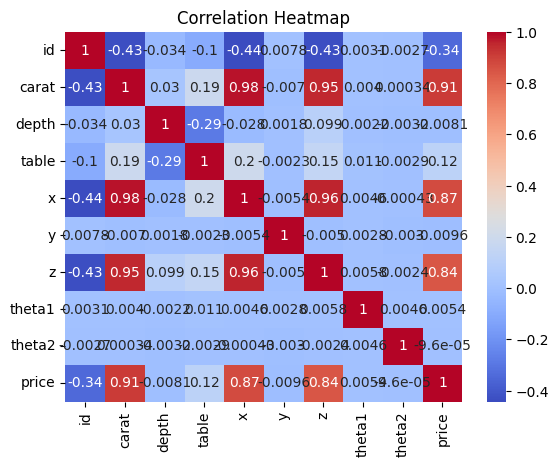

In [145]:
numeric_train = train.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_train.corr()

plt.figure()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Нужно поработать с выбросами, особенно по *z, y*

Я решил, что для удаления выбросов я буду использовать линейную интерполяцию

поработаем с выбросами

In [146]:
threshold = 3 * train['x'].std()
train = train[abs(train['x'] - train['x'].mean()) < threshold]

threshold = 3 * train['y'].std()
train = train[abs(train['y'] - train['y'].mean()) < threshold]

In [147]:
train = pd.get_dummies(train, columns=['color','clarity','cut'])
train = train.drop(columns=['theta1', 'theta2'])

In [148]:
from sklearn.model_selection import train_test_split

Y1 = train['price']
X1 = train.drop(columns = ['price'])

X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.3) # train = 0.7 датасета, остальное test


In [149]:
y_test

24456    3806
33952    4368
12000    1426
1141      844
3735      749
         ... 
30724    6232
16658    2632
32065    4761
19859    2230
19211    2843
Name: price, Length: 12118, dtype: int64

In [150]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_outliers(dataset):
    numeric_columns = dataset.select_dtypes(include=[np.number]).columns
    for column in numeric_columns:
        plt.figure(figsize=(8, 6))
        plt.boxplot(dataset[column], vert=False) 
        plt.title(f'Boxplot of {column}')
        plt.xlabel(column)
        plt.show()

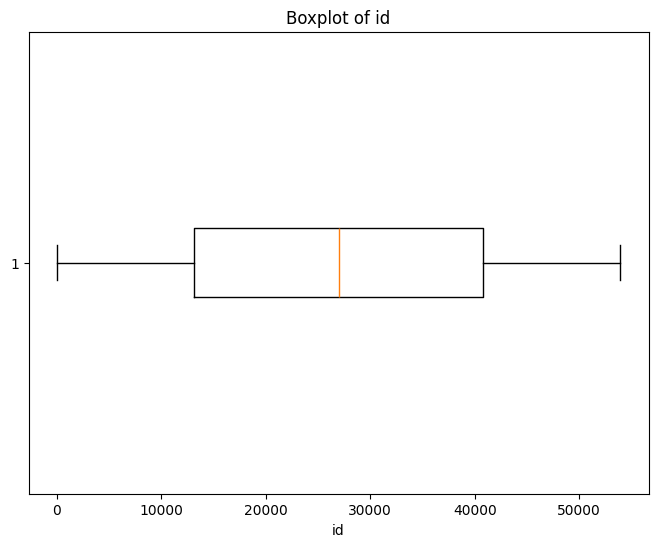

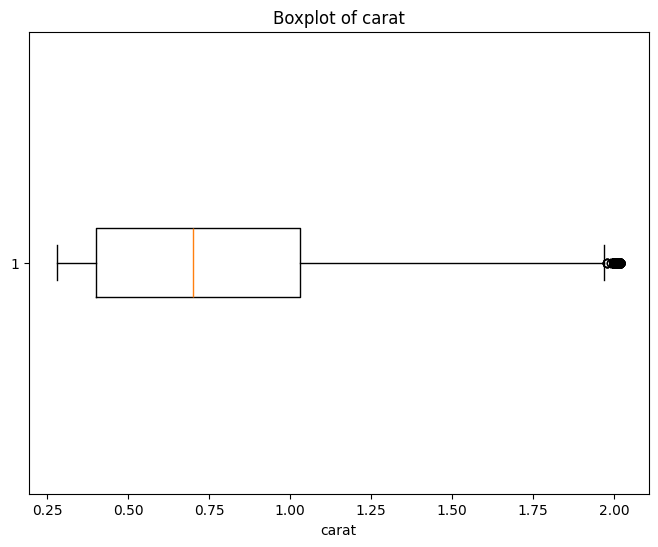

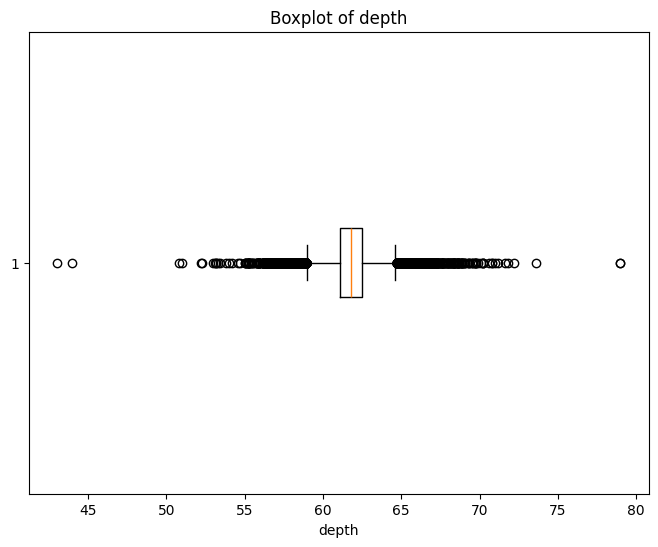

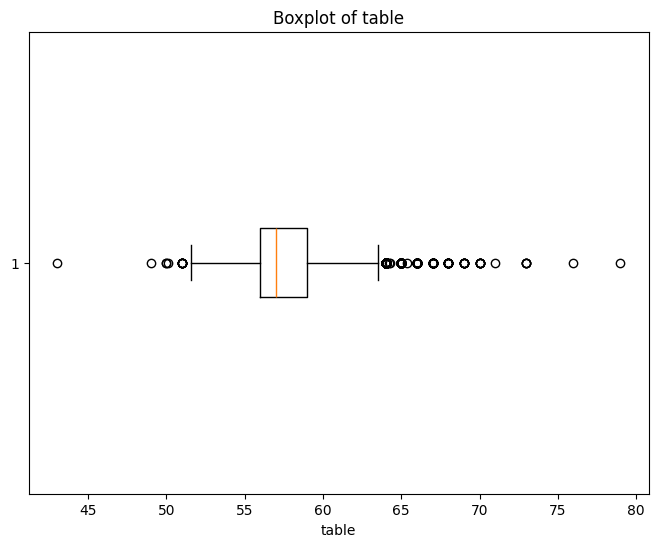

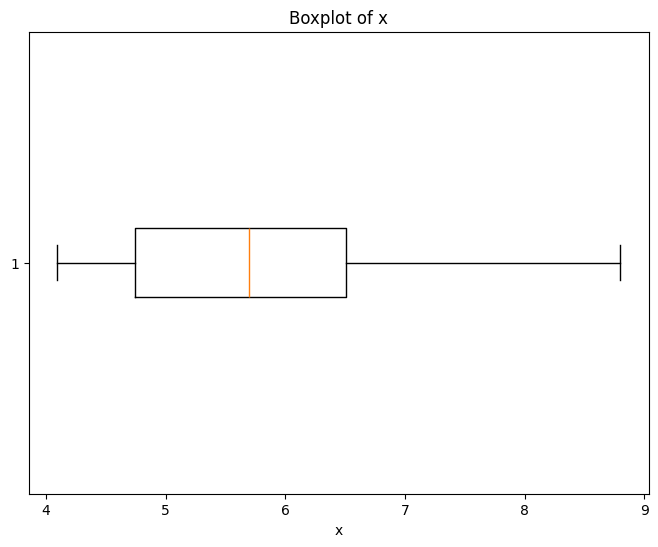

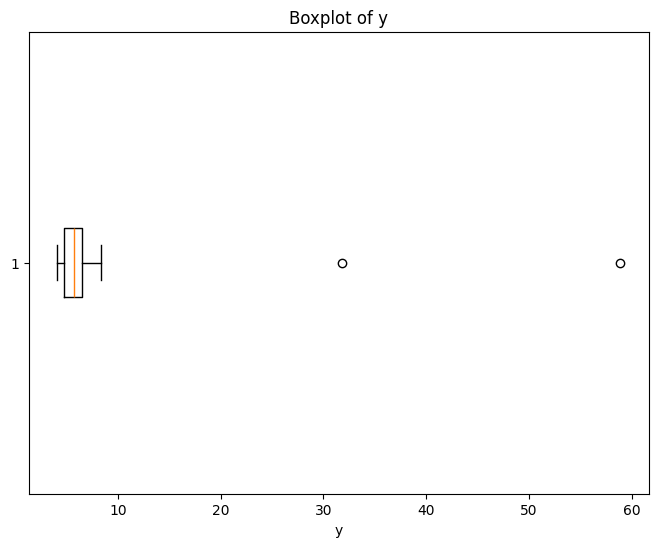

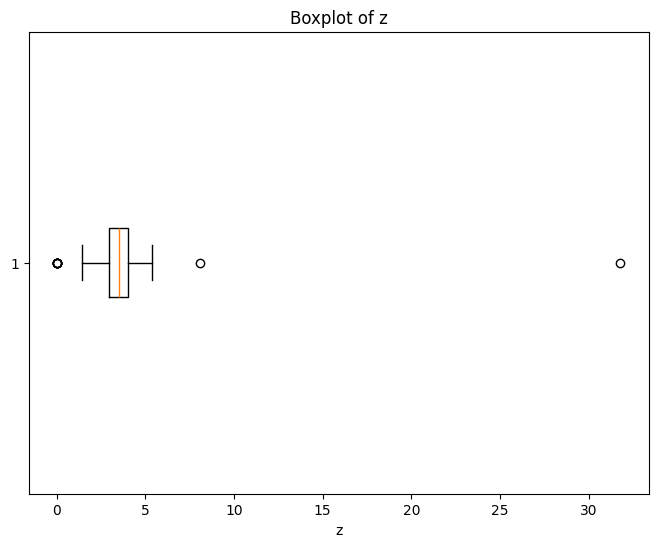

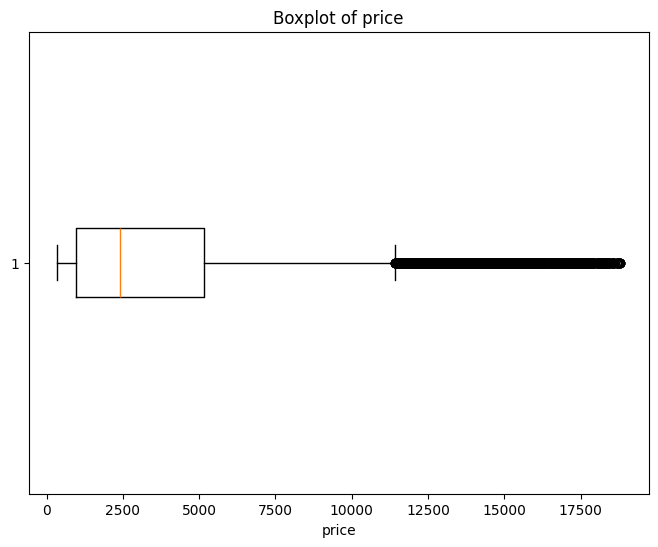

In [151]:
plot_outliers(train)

Как мы видим, присутствует много выбросов в y и z. Уберем их.

In [152]:
def remove_outliers(dataset, threshold=1.5):
    columns = dataset.select_dtypes(include=[np.number]).columns # Выбор числовых столбцов
    dataset_no_outliers = dataset.copy()

    for column in columns:
        q1 = dataset[column].quantile(0.25)
        q3 = dataset[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr

        dataset_no_outliers = dataset_no_outliers[
            (dataset_no_outliers[column] >= lower_bound) &
            (dataset_no_outliers[column] <= upper_bound)
        ]

    return dataset_no_outliers

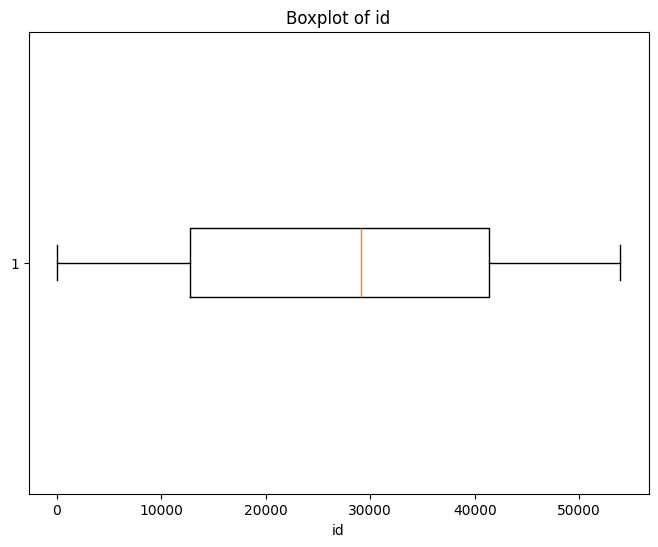

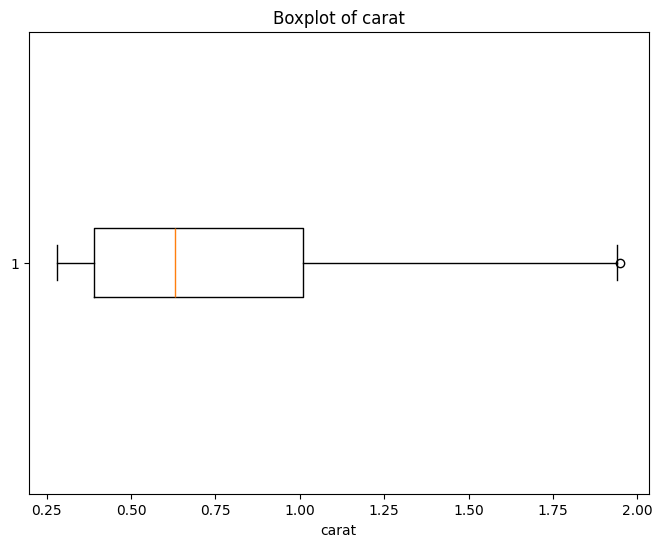

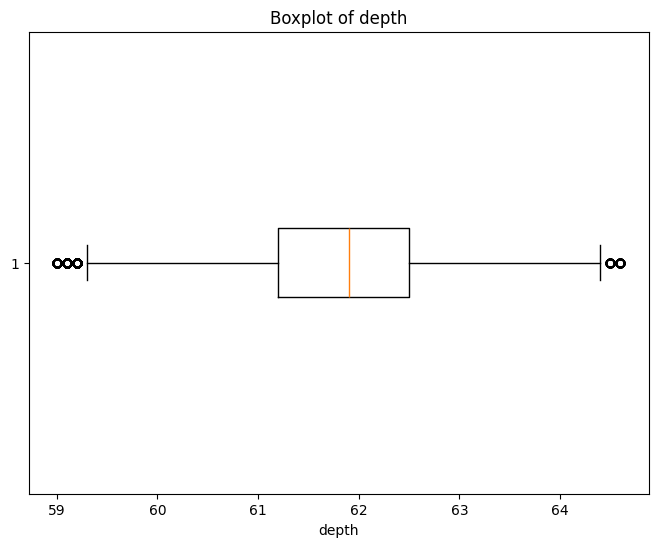

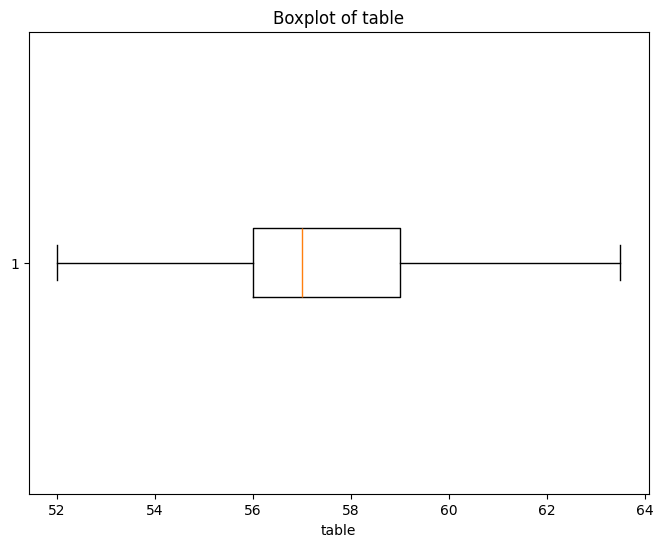

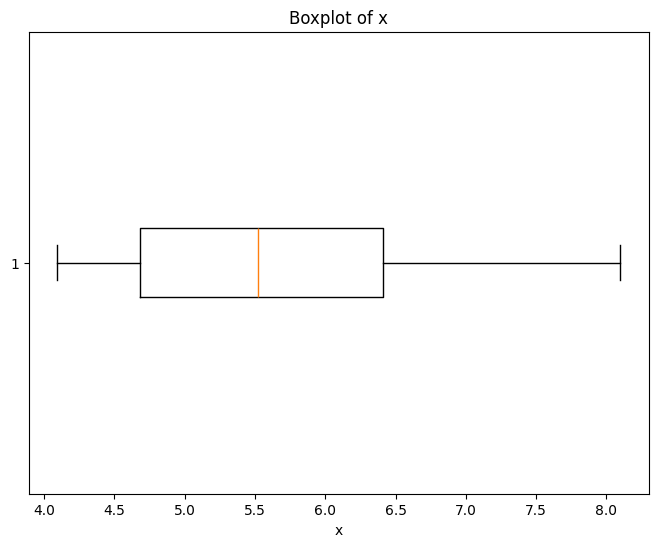

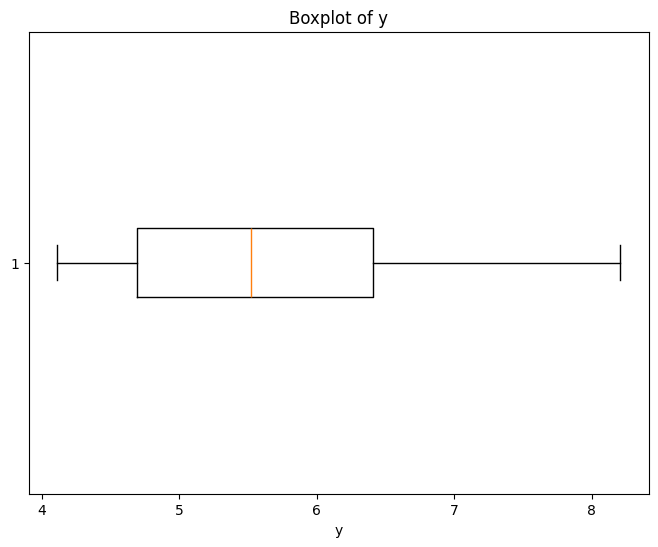

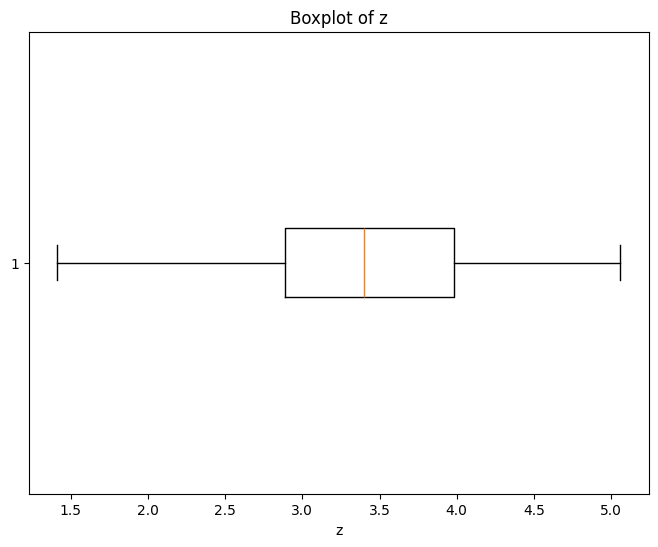

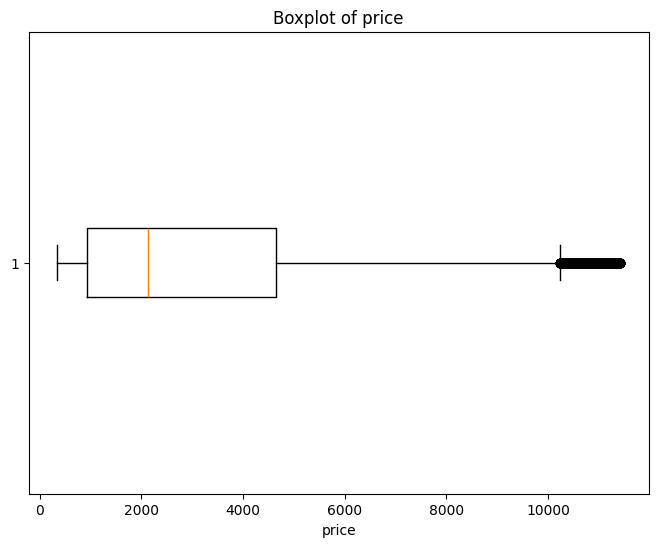

In [153]:
train = remove_outliers(train)
plot_outliers(train)

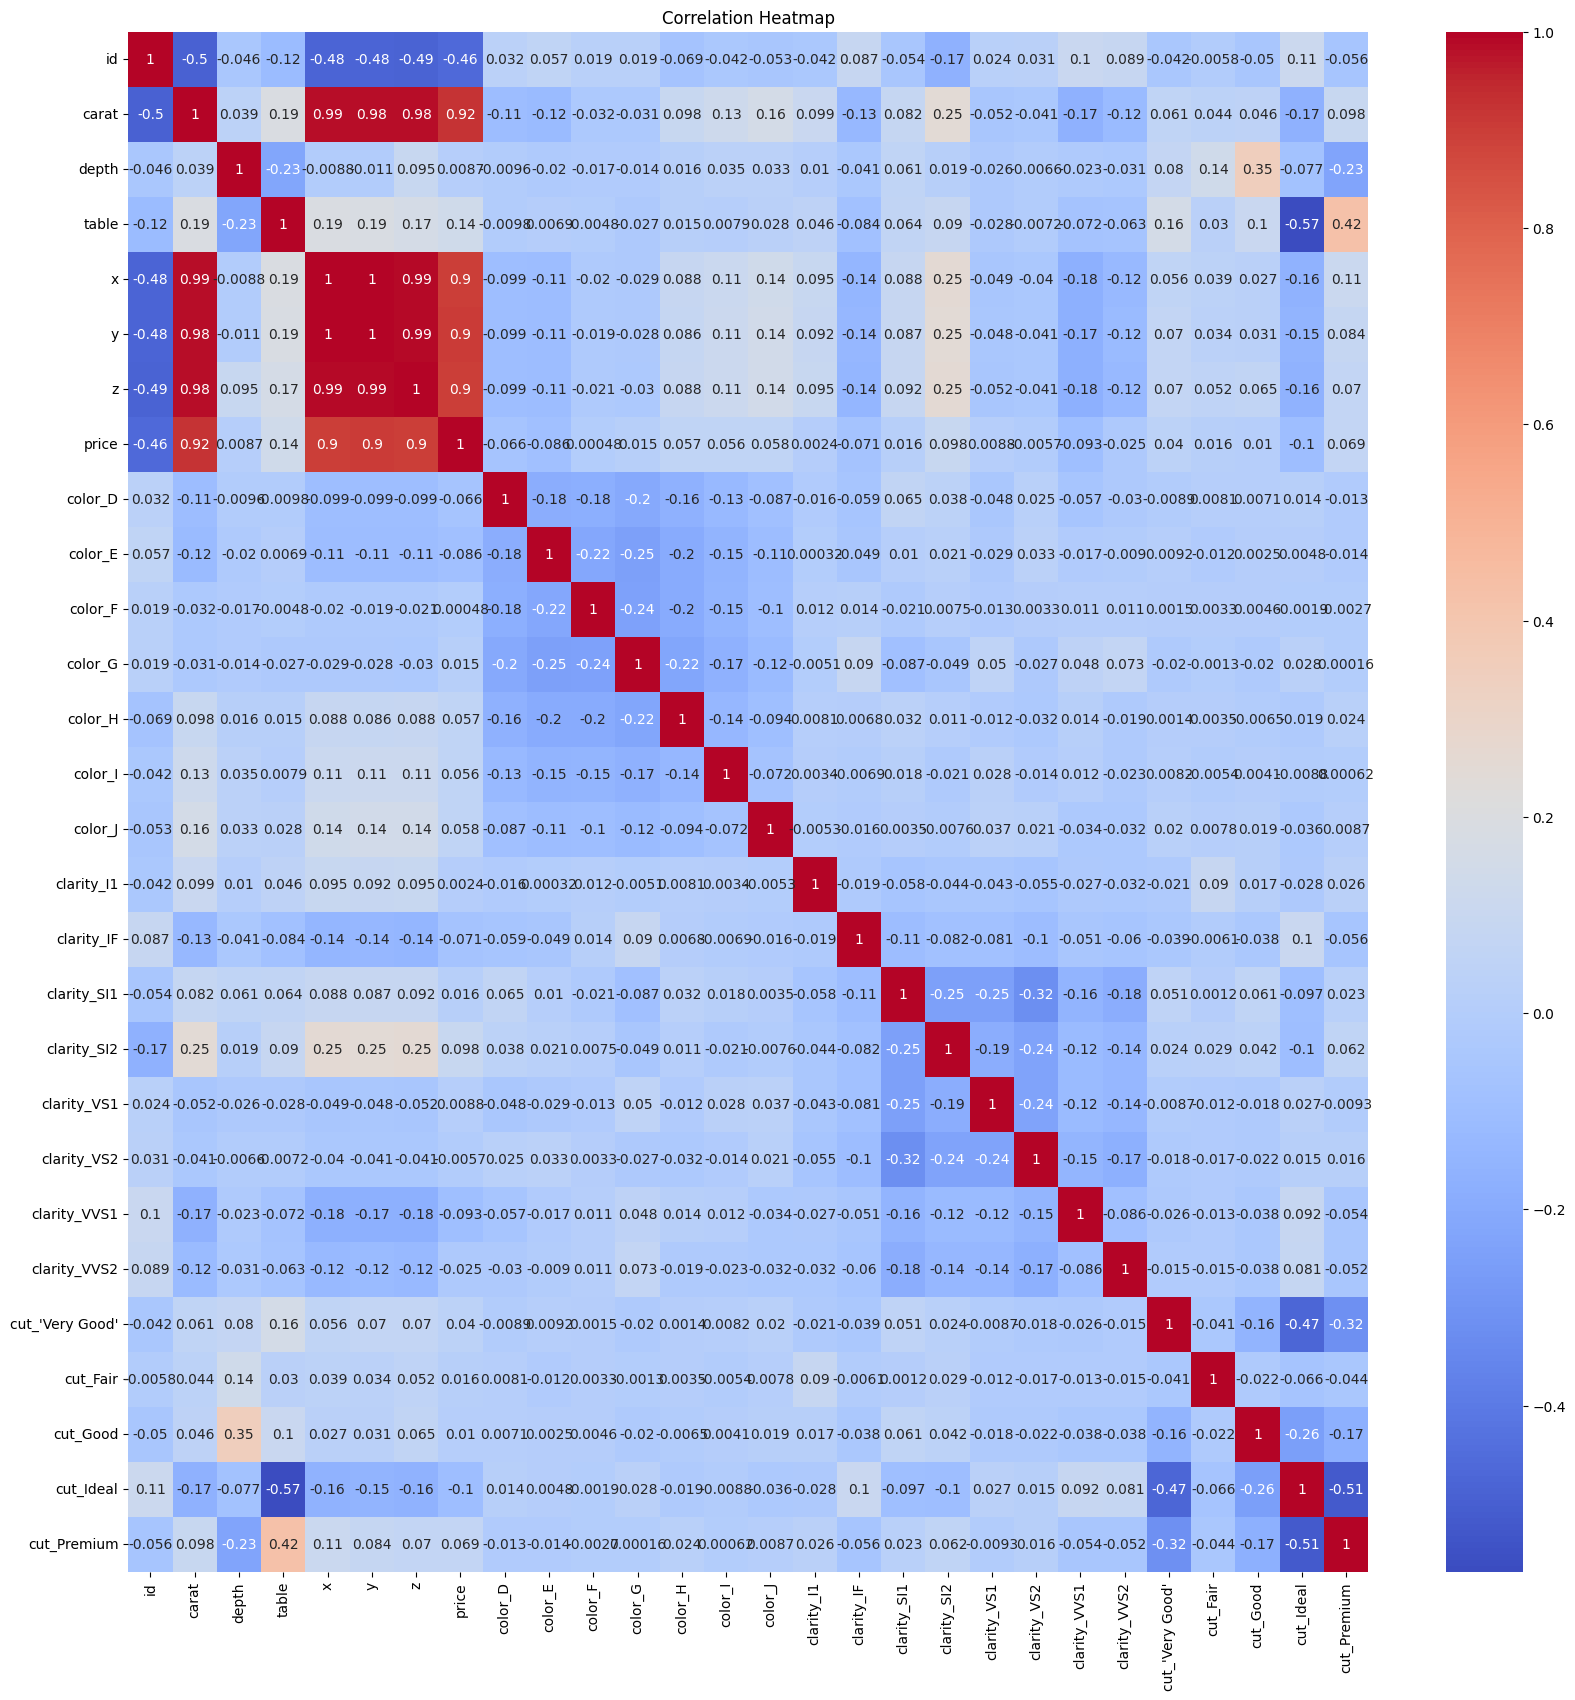

In [154]:
correlation_matrix = train.corr()

# Построение тепловой карты - корелляций
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Цена очень сильно коллерирует с размерами бриллианта, его весом(ну это было итак довольно логично, к бабке не ходи)

Также можно заметить, что размеры тоже друг с другом коррелируют, что тоже довольно логично (где вы видели тонкий бриллиант огромной площади?)

![image](https://bookdown.dongzhuoer.com/hadley/ggplot2-book/diagrams/diamond-dimensions.png)

Также можно заметить, что чем больше площадка бриллианта, тем с большей вероятностью он будет сиять как премиальный бриллиант.

![image](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRmQkgKetmvssv3sSzF3ryMyzM-YneZo202-g&usqp=CAU)

Также видно, чем "глубже" бриллиант - тем меньше шанс отнести его к премиальным и выше шанс отнести его к хорошим и плохим (по блеску)

![image](https://cms-media.taylorandhart.com/2022/10/26084820/Cut2-1000x916.jpg)

**Добавление новых признаков:** Так как есть сильная зависимость между линейными размерами я думаю вообще их снести и сделать один признак "объем" (V = x * y * z)

**Удаление мультиколлинеарных признаков:** Попробую удалить посмотреть что будет

**Использование регуляризации:** Регуляризация L1 или L2

MAE =  646.3040400372895
Минимальная цена в предсказании = 0.0
Количество значений меньше нуля = 0
Среднее всех значений меньше нуля = nan


/Users/alexvilno/Desktop/Lab_1_ML/ML_LAB_1/venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/alexvilno/Desktop/Lab_1_ML/ML_LAB_1/venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


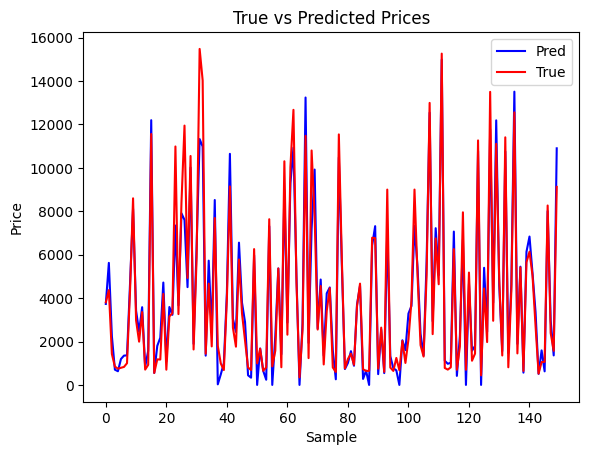

In [155]:
Y1 = train['price']
X1 = train.drop(columns = ['price'])

model_LR = LinearRegression()
model_LR.fit(X_train, y_train)  # Обучаем нашу модель

y_pred = model_LR.predict(X_test)  # Предсказываем результат
y_pred = np.clip(y_pred, 0, None)

print('MAE = ', mean_absolute_error(y_test, y_pred))  # Считаем нашу метрику

print('Минимальная цена в предсказании =', np.min(y_pred))  # Ищем минимальную цену
print('Количество значений меньше нуля =', np.count_nonzero(y_pred < 0))
print('Среднее всех значений меньше нуля =', np.mean(y_pred[y_pred < 0]))

plt.plot(y_pred[:150], color='b', label='Pred')
plt.plot(y_test.to_numpy()[:150], color='r', label="True")

plt.xlabel('Sample')
plt.ylabel('Price')
plt.title('True vs Predicted Prices')
plt.legend()
plt.show()

In [156]:
train['V'] = train['x'] * train['y'] * train['z']
train = train.drop(columns=['z', 'x', 'y'])

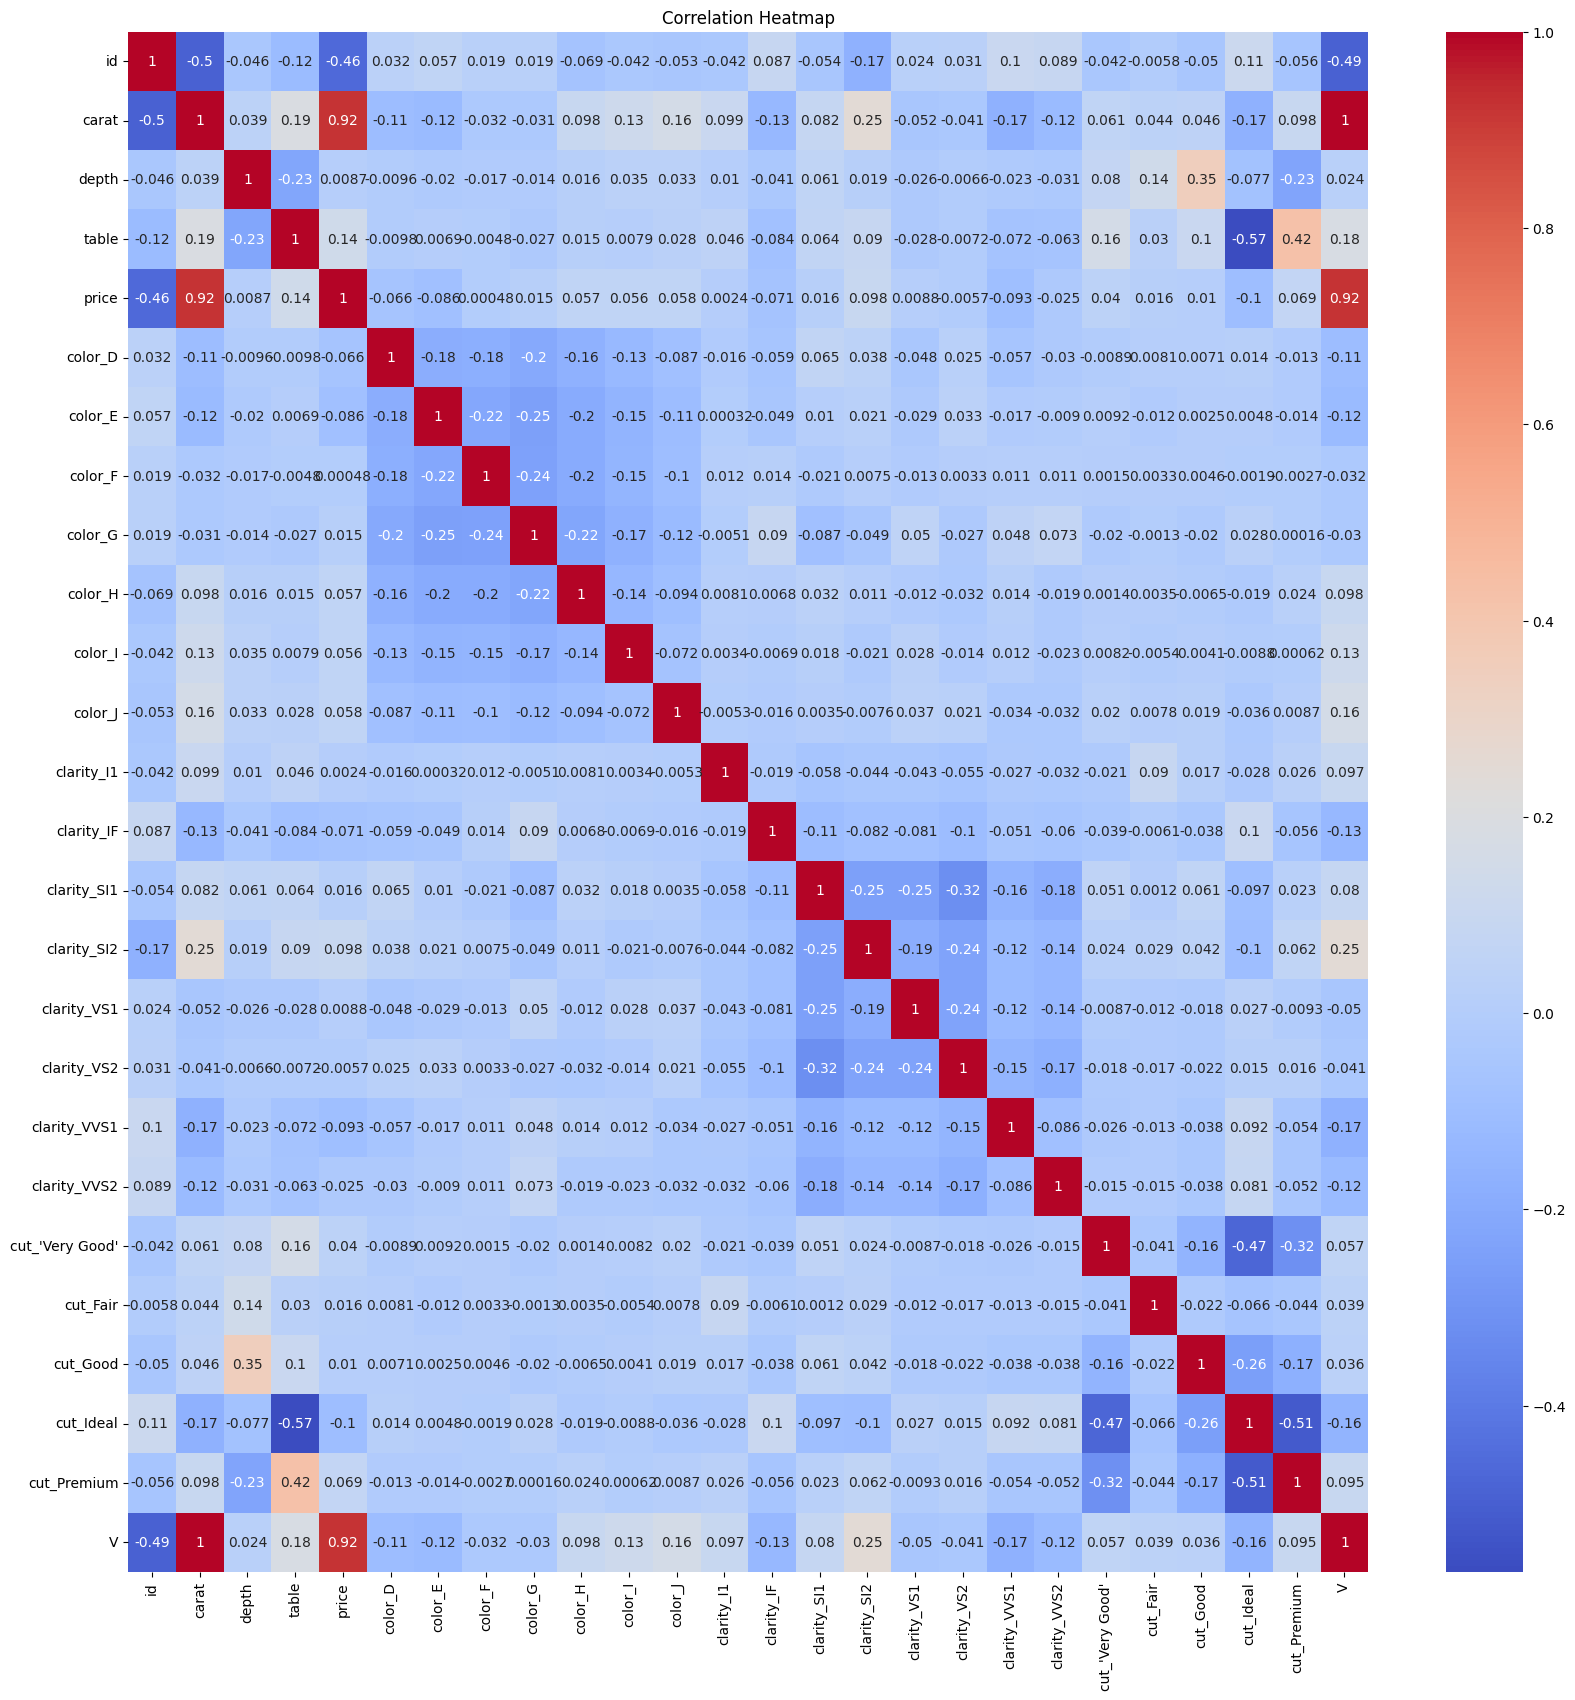

In [157]:
correlation_matrix = train.corr()

# Построение тепловой карты - корелляций
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

MAE =  508.6214012258557
Минимальная цена в предсказании = 0.0
Количество значений меньше нуля = 0
Среднее всех значений меньше нуля = nan


/Users/alexvilno/Desktop/Lab_1_ML/ML_LAB_1/venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/alexvilno/Desktop/Lab_1_ML/ML_LAB_1/venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


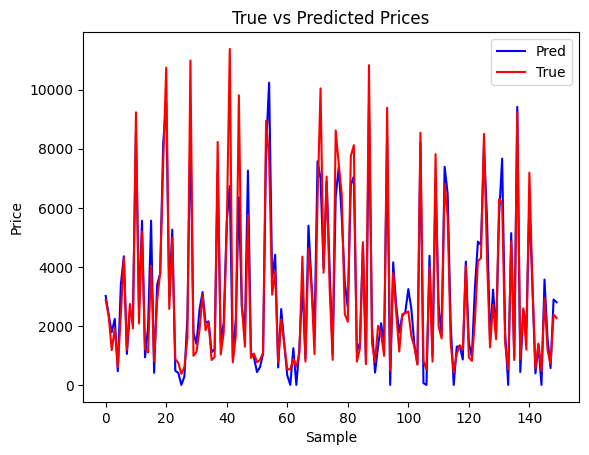

In [158]:
Y1 = train['price']
X1 = train.drop(columns = ['price'])

X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.3) # train = 0.7 датасета, остальное test


model_LR = LinearRegression()
model_LR.fit(X_train, y_train)  # Обучаем нашу модель

y_pred = model_LR.predict(X_test)  
y_pred = np.clip(y_pred, 0, None)
print('MAE = ', mean_absolute_error(y_test, y_pred))

print('Минимальная цена в предсказании =', np.min(y_pred))
print('Количество значений меньше нуля =', np.count_nonzero(y_pred < 0))
print('Среднее всех значений меньше нуля =', np.mean(y_pred[y_pred < 0]))

plt.plot(y_pred[:150], color='b', label='Pred')
plt.plot(y_test.to_numpy()[:150], color='r', label="True")

plt.xlabel('Sample')
plt.ylabel('Price')
plt.title('True vs Predicted Prices')
plt.legend()
plt.show()

Ну вот! Другое дело. MAE уже выглядит получше...

Можно применить регуляризацию L1


In [159]:
from sklearn.linear_model import Lasso

Y1 = train['price']
X1 = train.drop(columns = ['price'])

X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.3)

In [160]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(cv=10) 
lasso_cv.fit(X_train, y_train)

optimal_alpha = lasso_cv.alpha_

In [161]:
print(optimal_alpha)

19659.194880868832


MAE =  699.1300225157922


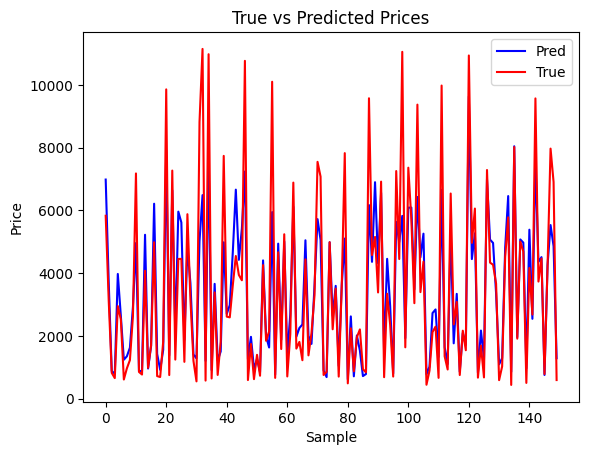

In [162]:
# l1 reg
lasso = Lasso(alpha=optimal_alpha) 
lasso.fit(X_train, y_train)


# Генерация прогнозов
y_pred = lasso.predict(X_test)
y_pred = np.clip(y_pred, 0, None)
print('MAE = ', mean_absolute_error(y_test, y_pred))  #MAE 

plt.plot(y_pred[:150], color='b', label='Pred')
plt.plot(y_test.to_numpy()[:150], color='r', label="True")

plt.xlabel('Sample')
plt.ylabel('Price')
plt.title('True vs Predicted Prices')
plt.legend()
plt.show()

MAE =  172.4479179162884


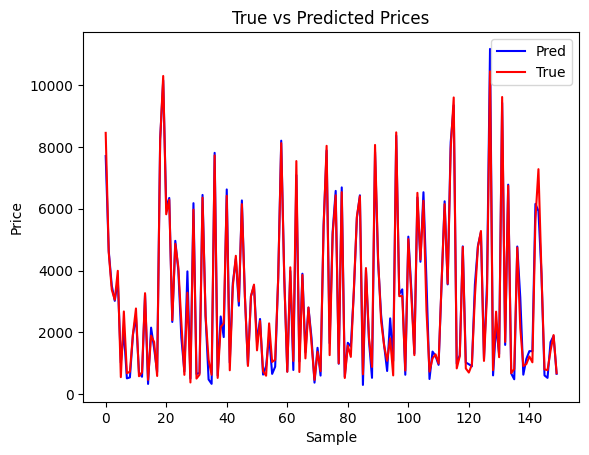

In [163]:
Y1 = train['price']
X1 = train.drop(columns = ['price'])

X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.3)

pipeline_3 = Pipeline([('poly', PolynomialFeatures(degree=3)), ('linear', LinearRegression())])
pipeline_3.fit(X_train,y_train) #Обучаем нашу модель


y_pred = pipeline_3.predict(X_test)
y_pred = np.clip(y_pred, 0, None)
print('MAE = ', mean_absolute_error(y_test, y_pred))

plt.plot(y_pred[:150], color='b', label='Pred')
plt.plot(y_test.to_numpy()[:150], color='r', label="True")

plt.xlabel('Sample')
plt.ylabel('Price')
plt.title('True vs Predicted Prices')
plt.legend()
plt.show()

Предсказание с удаленными признаками ```x, y, x``` и добавленным ```V```

In [164]:
test = pd.read_csv(path.join(sep, file_path, 'test.csv'))
ids = test['id']

In [165]:
test = pd.get_dummies(test, columns=['color','clarity','cut'])
test['V'] = test['x'] * test['y'] * test['z']
test = test.drop(columns=['theta1', 'theta2', 'x', 'y', 'z'])
y_pred = pipeline_3.predict(test)
y_pred = np.clip(y_pred, 0, None)

In [166]:
result_df = pd.DataFrame({'id': ids, 'price': y_pred})

In [167]:
result_df.to_csv(getenv('OUT_PATH'), index=False)

'id,price\n14085,5914.618397824444\n36447,698.0986946057747\n30782,1104.8320307356698\n43299,1346.0974010203718\n3378,24.866655068857654\n21184,9454.463899417686\n12387,846.9349273100888\n12556,5350.587940910409\n28050,752.7585372429094\n6718,359.4464598556988\n1156,3085.1901991605337\n49211,2629.556659761518\n8867,4372.923163611595\n14783,6079.890670311892\n14060,491.0810862932922\n25470,13155.39300211052\n44551,1402.2455071787626\n51284,2476.6916832062634\n45893,1531.6961409789728\n53239,2236.929431470773\n44639,1876.6308479947256\n46351,1811.890296553458\n30902,964.2595258973524\n6033,483.9090192630756\n23895,11392.317653257422\n24843,12125.22826245569\n41287,1673.2008286486598\n5740,3769.692198901721\n42862,1545.0829515001024\n13873,5800.14641789085\n22434,10204.015839121326\n2648,3122.588061735536\n43709,1625.1275325478855\n46210,1952.6771436878698\n53634,1046.1717674252795\n35718,645.8052617768044\n26910,15115.197688449909\n32565,1036.9584340444053\n52053,2744.7335446574943\n1057

### Вывод

Классическая модель линейной регрессии показала себя не с лучшей стороны, Даже после удаления мультикорреляционных признаков и объединения их в один признак. 
L1 регуляризация с оптимальным alpha в моем случае также не дала ощутимого прироста.
Сподвижки в улучшении результата начались лищь с использованием пайплайнов, а лучший результат был достигнут с помощью полиномиалных признаков (ст.3)

![image](https://sun9-65.userapi.com/impg/PwH9FUuyiWKb1WoWVLlNhOja3doWcBo14jk2-A/Rk6Ei80MxqI.jpg?size=2468x292&quality=96&sign=078e1e61fdca33db248ca5e586a9c2fe&type=album)